## Problem - ANOVA

##### The staff of a service center for electrical appliances include three technicians who specialize in repairing three widely used electrical appliances by three different manufacturers. It was desired to study the effects of Technician and Manufacturer on the service time. Each technician was randomly assigned five repair jobs on each manufacturer's appliance and the time to complete each job (in minutes) was recorded. The data for this particular experiment is thus attached.

##### Questions :

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt 
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the DataSet
ServiceData = pd.read_csv('Service.csv')
ServiceData.head()

,Technician,Manufacturer,Job,Service Time
0,1,1,1,62
1,1,1,2,48
2,1,1,3,63
3,1,1,4,57
4,1,1,5,69


In [3]:
# Columns are available in this ANOVA table
ServiceData.columns

Index(['Technician', 'Manufacturer', 'Job', 'Service Time'], dtype='object')

In [4]:
ServiceData=ServiceData.rename(columns = {'Service Time': 'ServiceTime'}, inplace = False)

In [5]:
# Description of ANOVA table
ServiceData.describe()

,Technician,Manufacturer,Job,ServiceTime
count,45.000000,45.000000,45.000000,45.000000
mean,2.000000,2.000000,3.000000,55.822222
std,0.825723,0.825723,1.430194,8.448477
min,1.000000,1.000000,1.000000,39.000000
25%,1.000000,1.000000,2.000000,50.000000
50%,2.000000,2.000000,3.000000,56.000000
75%,3.000000,3.000000,4.000000,62.000000
max,3.000000,3.000000,5.000000,70.000000


##### <span style="color:purple"> 1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘Manufacturer’ and ‘Technician' individually. – 3 points</span>

##### Hypothesis for conducting one-way ANOVA for Manufacturer with respect to Service time 
#####  H0: There is no significant effect in Service time based on Manufacturer. (H0 : μ1=μ2)  (Null Hypothesis)
#####  Ha: There is a significant effect in Service time based on Manufacturer.  (H0 : μ1!=μ2) (Alternative Hypothesis)

##### Hypothesis for conducting one-way ANOVA for Technician with respect to Service time
#####  H0: There is no significant effect in Service time based on Technician.  (H0 : μ1=μ2)  (Null Hypothesis)
#####  Ha: There is a significant effect in Service time based on Technician.   (H0 : μ1!=μ2) (Alternative Hypothesis)


##### <span style="color:purple"> 2) Perform one-way ANOVA for variable ‘Manufacturer’ with respect to the variable ‘Service Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results. - 3 points</span>

In [6]:
formula = 'ServiceTime ~ C(Manufacturer)'
model = ols(formula, ServiceData).fit()
aov_table = anova_lm(model)
print(aov_table)

                   df       sum_sq    mean_sq         F    PR(>F)
C(Manufacturer)   2.0    28.311111  14.155556  0.191029  0.826822
Residual         42.0  3112.266667  74.101587       NaN       NaN


##### From this above ANOVA table, we can see that here P value is greater than 0.05 (level of significance) , hence we fail to reject the null hypothesis.

##### <span style="color:purple"> 3) Perform one-way ANOVA for variable ‘Technician’ with respect to the variable ‘Service Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results. - 3 points</span>

In [7]:
formula = 'ServiceTime ~ C(Technician)'
model = ols(formula, ServiceData).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df       sum_sq    mean_sq        F    PR(>F)
C(Technician)   2.0    24.577778  12.288889  0.16564  0.847902
Residual       42.0  3116.000000  74.190476      NaN       NaN


##### From this above ANOVA table, we can see that here P value is greater than 0.05 (level of significance) , hence we fail to reject the null hypothesis.

##### <span style="color:purple"> 4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments?</span>
#####    [hint: use the ‘pointplot’ function from the ‘seaborn’ graphical subroutine in Python] - 4 points</span>

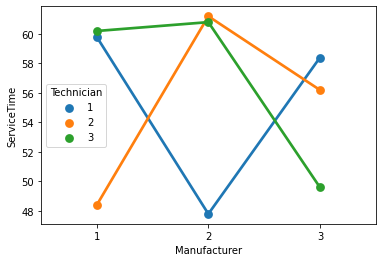

In [8]:
# Generating point plot without confidence interval 
sns.pointplot(x='Manufacturer',y='ServiceTime',data=ServiceData,hue='Technician',ci=None);

##### Technician 2 with Manufacturer 1 & Technician 1 with Manufacturer 2 takes almost same service time (which is close to 48 mins).
##### Technician 1 & Technician 3 with Manufacturer 1 takes almost similar service time (which is ~60 mins).
##### Technician 2 & Technician 3 with Manufacturer 2 takes almost similar service time (which is little over 60 mins).
##### Technician 1 takes maximum service time with Manufacturer 1 (which is ~60 mins) and minimum service time with Manufacturer 2 (which is ~48 mins).
##### Technician 2 takes maximum service time with Manufacturer 2 (which is little over 60 mins) & minimum service time with Manufacturer 1 (which is ~48 mins).
##### Technician 3 takes maximum service time with Manufacturer 2 (which is ~60 mins) & minimum service time with manufacturer 3 (which is little lesser than 50 mins).


##### <span style="color:purple"> 5) Perform a two-way ANOVA based on the variables ‘Manufacturer’ & ‘Technician’ with respect to the variable ‘Service Time’ and state your results. - 5 points</span>

In [9]:
# Performing two-way ANOVA without interaction of two variables (Manufacturer & Technician)
formula = 'ServiceTime ~ C(Manufacturer) + C(Technician)'
model = ols(formula, ServiceData).fit()
aov_table = anova_lm(model)
print(aov_table)

                   df       sum_sq    mean_sq         F    PR(>F)
C(Manufacturer)   2.0    28.311111  14.155556  0.183381  0.833147
C(Technician)     2.0    24.577778  12.288889  0.159199  0.853365
Residual         40.0  3087.688889  77.192222       NaN       NaN


In [10]:
# Performing two-way ANOVA with interaction of two variables (Manufacturer & Technician)
formula = 'ServiceTime ~ C(Manufacturer) + C(Technician) + C(Manufacturer):C(Technician)'
model = ols(formula, ServiceData).fit()
aov_table = anova_lm(model)
print(aov_table)

                                 df       sum_sq     mean_sq         F  \
C(Manufacturer)                 2.0    28.311111   14.155556  0.272164   
C(Technician)                   2.0    24.577778   12.288889  0.236274   
C(Manufacturer):C(Technician)   4.0  1215.288889  303.822222  5.841487   
Residual                       36.0  1872.400000   52.011111       NaN   

                                 PR(>F)  
C(Manufacturer)                0.763283  
C(Technician)                  0.790779  
C(Manufacturer):C(Technician)  0.000994  
Residual                            NaN  


##### From the above two-way ANOVA table we can see for both variable "Manufacturer" & "Technician" P value is greater than 0.05 (level of significance), hence we fail to reject the null hypothesis here , so we can conclude that "Manufactuer" & "Technician" are not really a significant factor in terms of deciding the hypothesis.
##### But if we look at the interaction between "Manufacturer" & "Technician" , in this case P value < 0.05 (level of significance), Hence we reject null hypothesis . We can understand the interaction b/w "Manufactuer" & "Technician" playing a major role interms of deciding the hypothesis . 

##### <span style="color:purple"> 6) Mention the business implications of performing ANOVA for this particular case study. - 5 points</span>

##### Technician 1 takes maximum service time with Manufacturer 1 (which is ~60 mins) and minimum service time with Manufacturer 2 (which is ~48 mins).
##### Technician 2 takes maximum service time with Manufacturer 2 (which is little over 60 mins) & minimum service time with Manufacturer 1 (which is ~48 mins).
##### Technician 3 takes maximum service time with Manufacturer 2 (which is ~60 mins) & minimum service time with manufacturer 3 (which is little lesser than 50 mins).
##### Manufacturer 3 looks like most efficient among all 3 manufacturer as on an avg. all 3 technician takes comparatively lesser service time .
##### Manufacturer 2 looks like the least efficient as out of 3 there are 2 technician takes maximum service time with manufacturer 2 equipments.
##### Technician 2 looks most efficient as he/she takes comparatively lesser service time with all 3 manufacturers .
##### Technician 3 looks least efficient as he/she takes comparatively more service time with all 3 manufacturers .
##### Interaction b/w "Manufactuer" & "Technician" playing a major role interms of deciding the Service time 

## Problem - PCA 
###### The ‘Hair Salon.csv’ dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric.

###### Note: This particular dataset contains the target variable satisfaction as well. Please do drop this variable before doing Principal Component Analysis.


##### Questions:

In [54]:
# Reading the DataSet
SalonData = pd.read_csv('Hair Salon.csv')
SalonData.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [55]:
# As per instruction given we are dropping target variable Satisfaction.
SalonData.drop("Satisfaction", inplace=True, axis=1)
SalonData.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5


In [56]:
# Descriptive statistics to summarize the data
SalonData.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


In [57]:
# Information of the data
SalonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           100 non-null    int64  
 1   ProdQual     100 non-null    float64
 2   Ecom         100 non-null    float64
 3   TechSup      100 non-null    float64
 4   CompRes      100 non-null    float64
 5   Advertising  100 non-null    float64
 6   ProdLine     100 non-null    float64
 7   SalesFImage  100 non-null    float64
 8   ComPricing   100 non-null    float64
 9   WartyClaim   100 non-null    float64
 10  OrdBilling   100 non-null    float64
 11  DelSpeed     100 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 9.5 KB


In [58]:
# Shape of the data (No. of Row's & Column's)
SalonData.shape

(100, 12)

In [59]:
# Checking for null values (if it is there)
SalonData.isnull().values.any()

False

In [60]:
# Checking for duplicate data 
duplicate = SalonData.duplicated()
duplicate.sum()

0

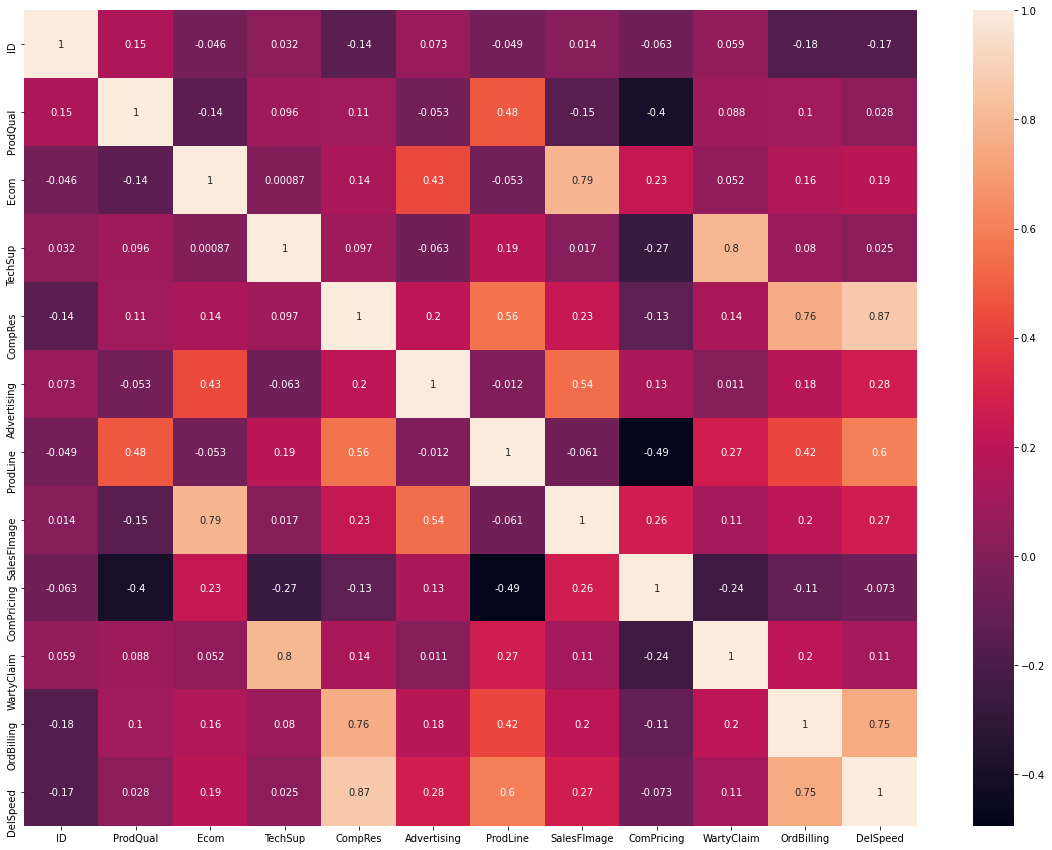

In [61]:
# Checking the correlations with the help of Heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(SalonData.corr(),annot=True);

##### <span style="color:purple"> 1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented. – 5 points</span>

##### Univariate Analysis

In [18]:
SalonData.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

##### Here before proceeding with Univariate & Multivariate analysis we need to drop "ID" column as its used here just as an unique identity for each salon.

In [62]:
SalonData.drop("ID", inplace=True, axis=1)
SalonData.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5


In [63]:
# Defining a method for Univariate Analysis 

def univariateAnalysis(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(SalonData[column].describe(),end=' ')
    print("\n----------------------------------------------------------------------------")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(SalonData[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=SalonData[column])
    plt.show()

Description of ProdQual
----------------------------------------------------------------------------
count    100.000000
mean       7.810000
std        1.396279
min        5.000000
25%        6.575000
50%        8.000000
75%        9.100000
max       10.000000
Name: ProdQual, dtype: float64 
----------------------------------------------------------------------------
Distribution of ProdQual
----------------------------------------------------------------------------


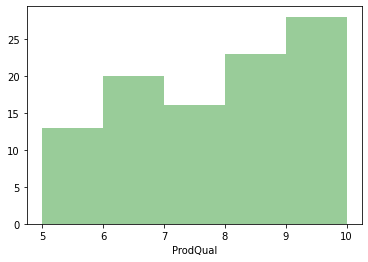

BoxPlot of ProdQual
----------------------------------------------------------------------------


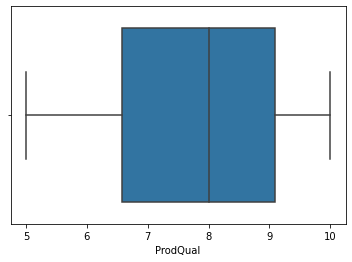

Description of Ecom
----------------------------------------------------------------------------
count    100.000000
mean       3.672000
std        0.700516
min        2.200000
25%        3.275000
50%        3.600000
75%        3.925000
max        5.700000
Name: Ecom, dtype: float64 
----------------------------------------------------------------------------
Distribution of Ecom
----------------------------------------------------------------------------


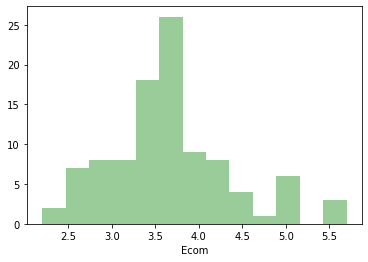

BoxPlot of Ecom
----------------------------------------------------------------------------


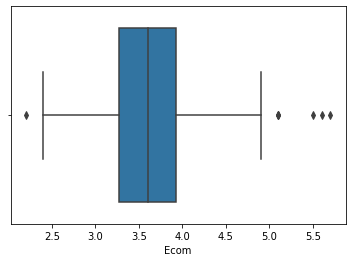

Description of TechSup
----------------------------------------------------------------------------
count    100.000000
mean       5.365000
std        1.530457
min        1.300000
25%        4.250000
50%        5.400000
75%        6.625000
max        8.500000
Name: TechSup, dtype: float64 
----------------------------------------------------------------------------
Distribution of TechSup
----------------------------------------------------------------------------


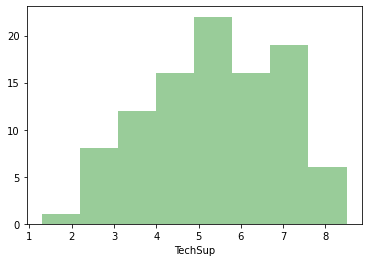

BoxPlot of TechSup
----------------------------------------------------------------------------


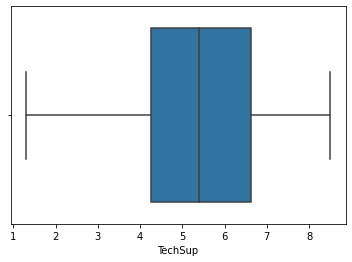

Description of CompRes
----------------------------------------------------------------------------
count    100.000000
mean       5.442000
std        1.208403
min        2.600000
25%        4.600000
50%        5.450000
75%        6.325000
max        7.800000
Name: CompRes, dtype: float64 
----------------------------------------------------------------------------
Distribution of CompRes
----------------------------------------------------------------------------


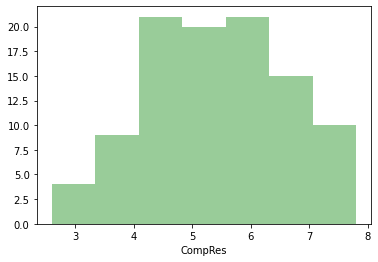

BoxPlot of CompRes
----------------------------------------------------------------------------


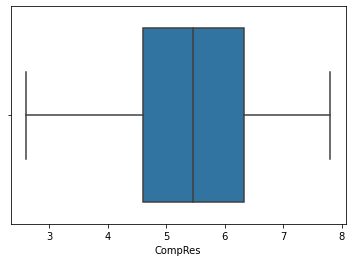

Description of Advertising
----------------------------------------------------------------------------
count    100.000000
mean       4.010000
std        1.126943
min        1.900000
25%        3.175000
50%        4.000000
75%        4.800000
max        6.500000
Name: Advertising, dtype: float64 
----------------------------------------------------------------------------
Distribution of Advertising
----------------------------------------------------------------------------


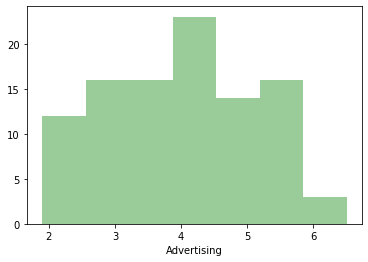

BoxPlot of Advertising
----------------------------------------------------------------------------


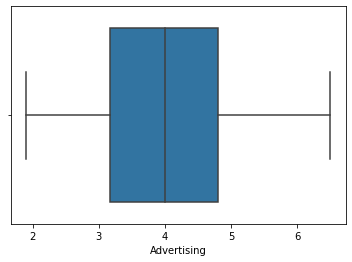

Description of ProdLine
----------------------------------------------------------------------------
count    100.000000
mean       5.805000
std        1.315285
min        2.300000
25%        4.700000
50%        5.750000
75%        6.800000
max        8.400000
Name: ProdLine, dtype: float64 
----------------------------------------------------------------------------
Distribution of ProdLine
----------------------------------------------------------------------------


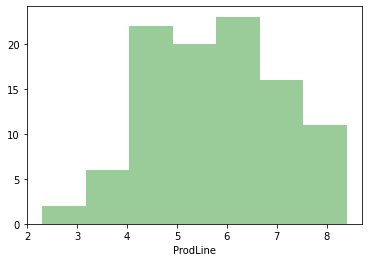

BoxPlot of ProdLine
----------------------------------------------------------------------------


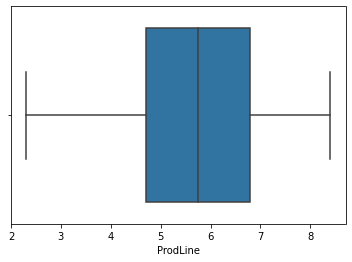

Description of SalesFImage
----------------------------------------------------------------------------
count    100.00000
mean       5.12300
std        1.07232
min        2.90000
25%        4.50000
50%        4.90000
75%        5.80000
max        8.20000
Name: SalesFImage, dtype: float64 
----------------------------------------------------------------------------
Distribution of SalesFImage
----------------------------------------------------------------------------


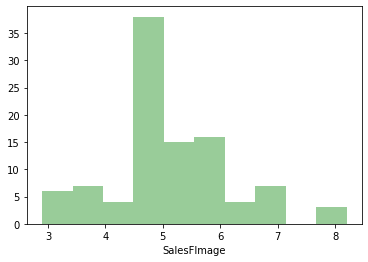

BoxPlot of SalesFImage
----------------------------------------------------------------------------


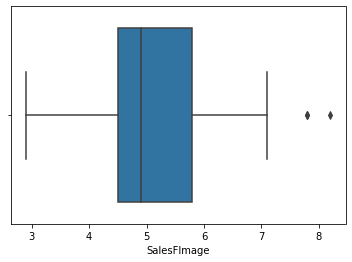

Description of ComPricing
----------------------------------------------------------------------------
count    100.000000
mean       6.974000
std        1.545055
min        3.700000
25%        5.875000
50%        7.100000
75%        8.400000
max        9.900000
Name: ComPricing, dtype: float64 
----------------------------------------------------------------------------
Distribution of ComPricing
----------------------------------------------------------------------------


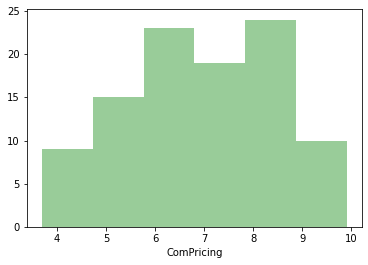

BoxPlot of ComPricing
----------------------------------------------------------------------------


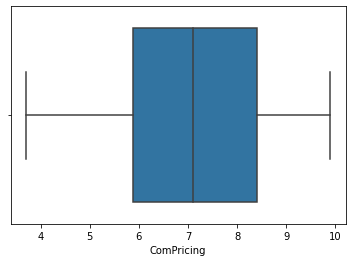

Description of WartyClaim
----------------------------------------------------------------------------
count    100.000000
mean       6.043000
std        0.819738
min        4.100000
25%        5.400000
50%        6.100000
75%        6.600000
max        8.100000
Name: WartyClaim, dtype: float64 
----------------------------------------------------------------------------
Distribution of WartyClaim
----------------------------------------------------------------------------


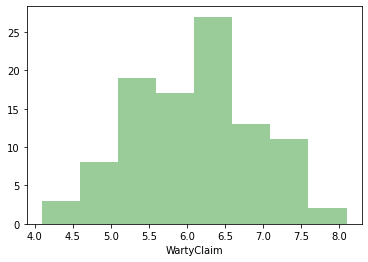

BoxPlot of WartyClaim
----------------------------------------------------------------------------


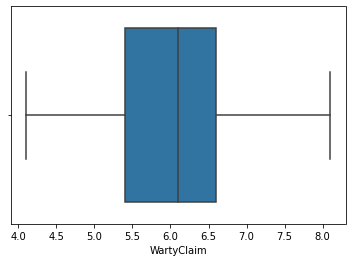

Description of OrdBilling
----------------------------------------------------------------------------
count    100.00000
mean       4.27800
std        0.92884
min        2.00000
25%        3.70000
50%        4.40000
75%        4.80000
max        6.70000
Name: OrdBilling, dtype: float64 
----------------------------------------------------------------------------
Distribution of OrdBilling
----------------------------------------------------------------------------


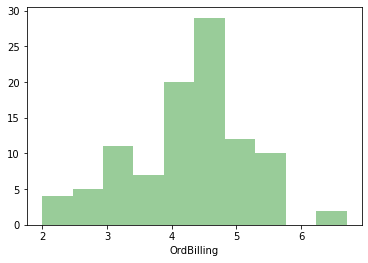

BoxPlot of OrdBilling
----------------------------------------------------------------------------


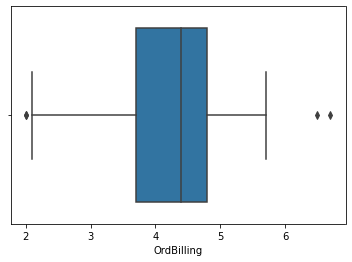

Description of DelSpeed
----------------------------------------------------------------------------
count    100.000000
mean       3.886000
std        0.734437
min        1.600000
25%        3.400000
50%        3.900000
75%        4.425000
max        5.500000
Name: DelSpeed, dtype: float64 
----------------------------------------------------------------------------
Distribution of DelSpeed
----------------------------------------------------------------------------


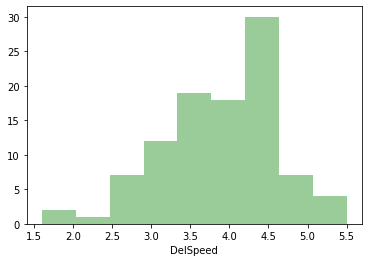

BoxPlot of DelSpeed
----------------------------------------------------------------------------


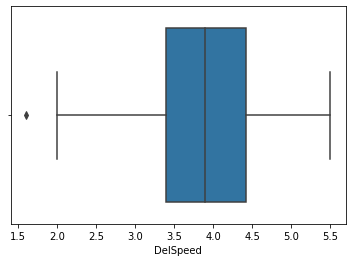

In [64]:
for x in SalonData:
    univariateAnalysis(x,10)

#### Multivariate Analysis 

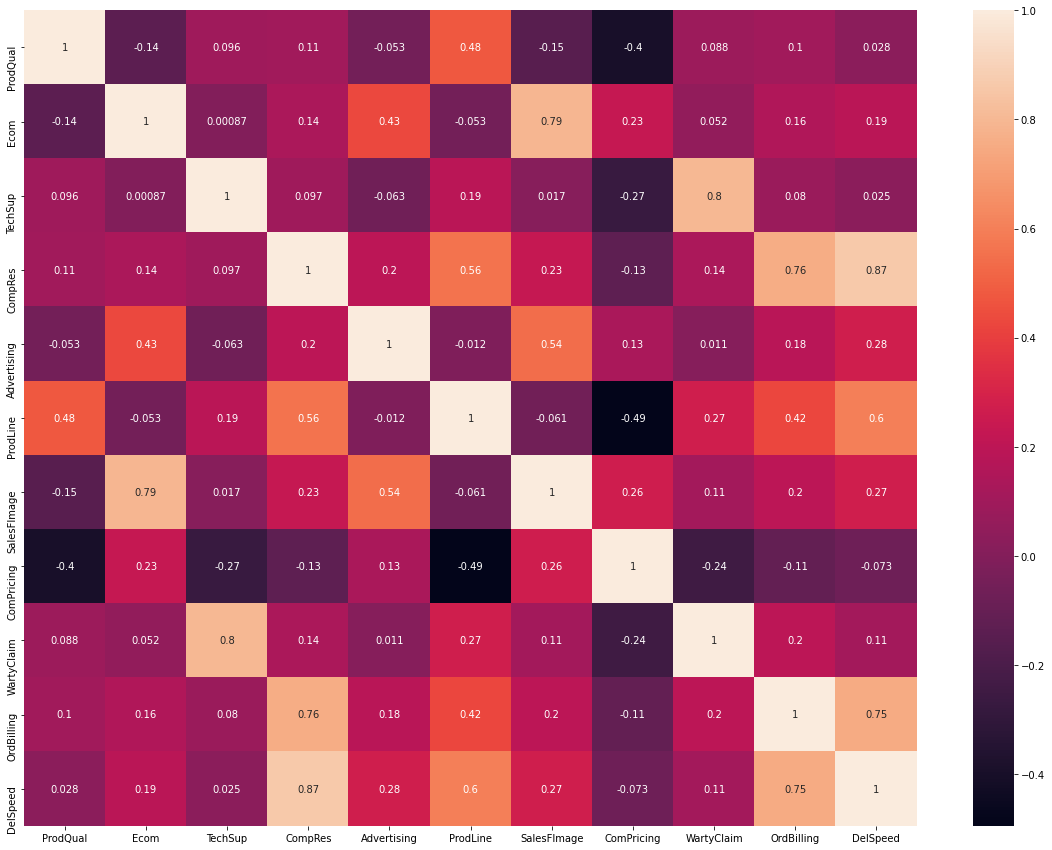

In [65]:
plt.subplots(figsize=(20,15))
sns.heatmap(SalonData.corr(),annot=True);

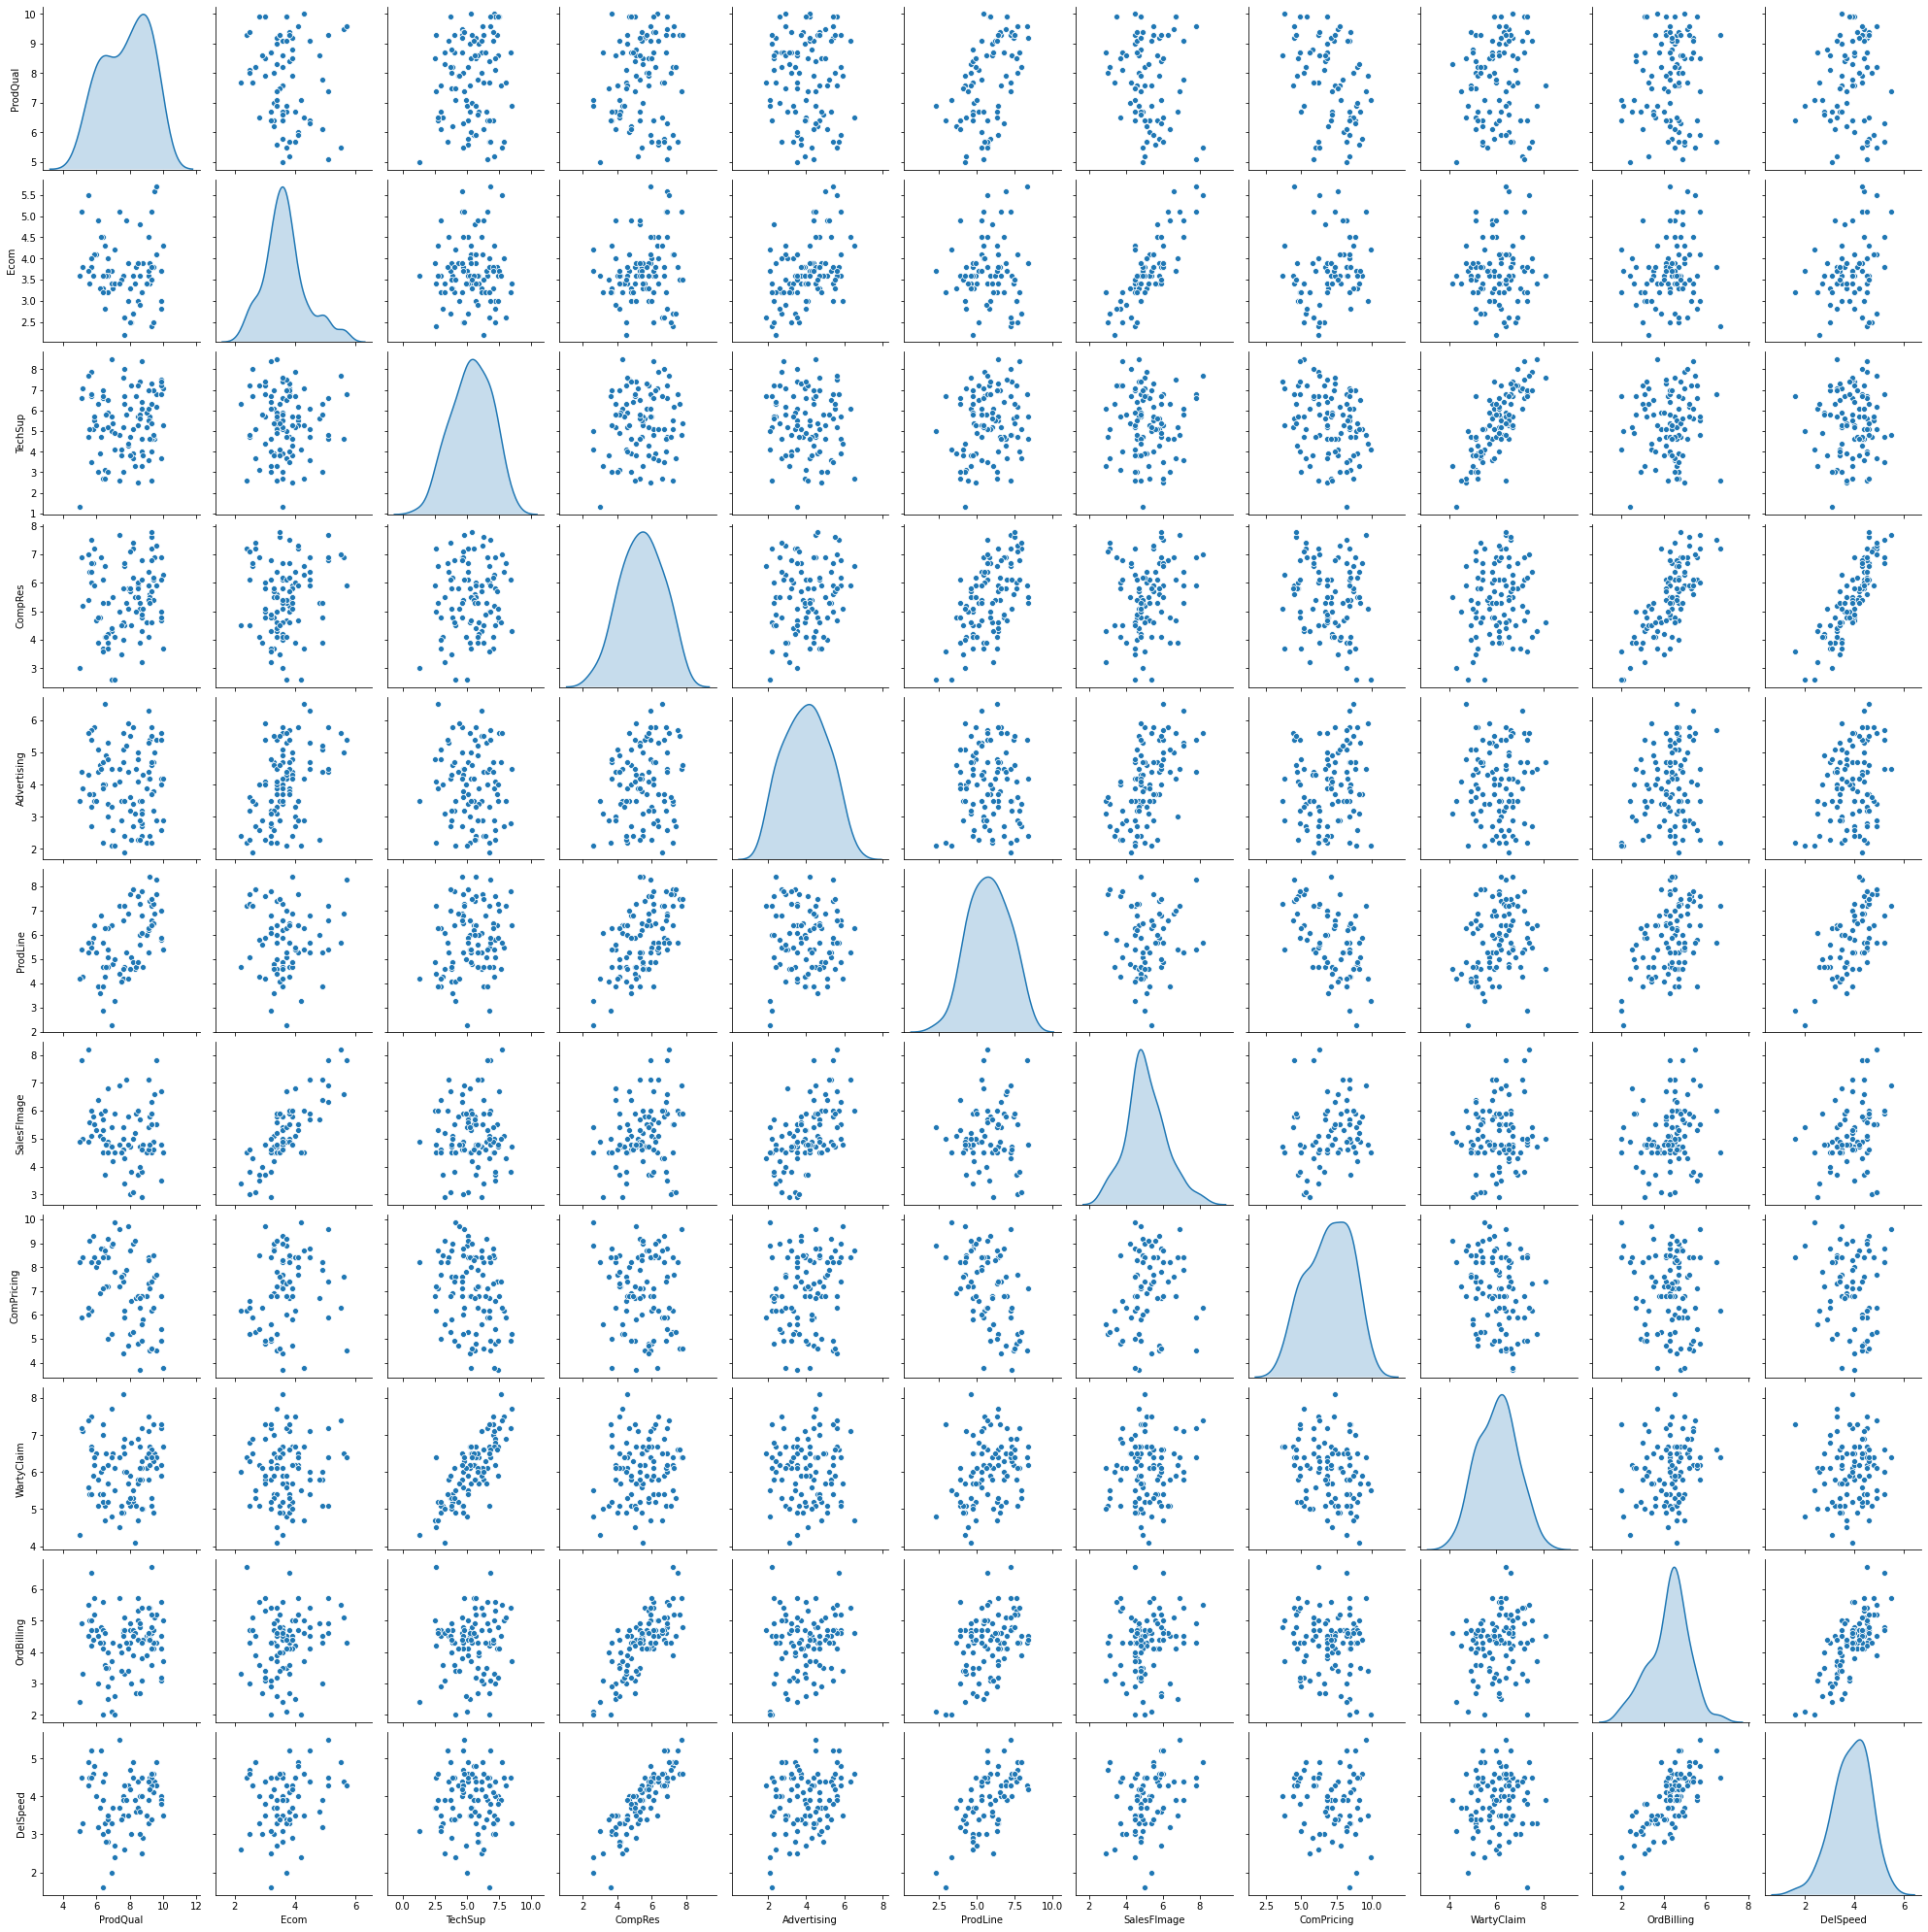

In [66]:
sns.pairplot(SalonData,diag_kind='kde');

##### Inferences drawn from the above analysis:
##### 1. Data consists of 100 Hair salons information with 12 different market segmentation.
##### 2. There are no missing & duplicate values in the data set.
##### 3. All Salons are identified by the unique ID which is mentioned by "ID" column.
##### 4. All columns are numerical fields.
##### 5. Almost all columns have some amount of difference b/w mean and median values, which shows data set has some amount of skewness.
##### 6. Data set has outliers.
##### 7. High correlation observed b/w warranty claim & Technical Support .
##### 8. High correlation observed b/w Delivery Speed & Complaint Resolution .
##### 9. High correlation observed b/w Salesforce Imgae & E-commerce .
##### 10. Potentially better correlation observed b/w OrderBilling & Complaint Resolution .


##### <span style="color:purple"> 2) Scale the variables and write the inference for using the type of scaling function for this case study. - 3 points</span>

In [67]:
SalonData.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5


In [68]:
SalonData_scaled = SalonData.apply(zscore)
SalonData_scaled.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220


##### Basically if all the columns in a table or dataset are not in a same magnitude then its really difficult to compare them and come to a conclusion , so by scaling them we bring their magnitude into a certain range where we can compare them and come to conclusion , derive business implications.
##### Inferences for using this scaling mechanism :
##### 1. Z-scores normalisation are a way to compare results from a test to a “normal” population and bring them to a same comparable scale.
##### 2. Z Score can be used to compare raw scores that are taken from different tests .
##### 3. Z score takes into account both the mean value and the variability in a set of raw scores.
##### 4. Z Score always assume a normal distribution. Here in this dataset / case study we can see very minimal skewness in terms of data distribution ,hence we used this.
##### 5. Z score mechanism is simple and easy to implement .
##### 6. Z score provides better computation. Computationally, it can speed up the calculation .
##### 7. Z score provide better interpretetion of the data.

##### <span style="color:purple"> 3) Comment on the comparison between covariance and the correlation matrix after scaling. - 2 points</span>

In [69]:
# Without Scaling the correlation matrix 
SalonData.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003


In [70]:
# With Scaling the correlation matrix 
SalonData_scaled.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003


##### Covariance tells us the direction of the linear relationship between two variables. Correlation indicates the measures of both the strength and direction of the linear relationship between two variables. Correlation is function of the covariance. We can find the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values. Here before & after Scaling correlation matrix gives same result.

##### So in one word we can conclude saying correlation matrix is just a scaled derivative of the covariance matrix.¶


##### <span style="color:purple"> 4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise. - 3 points</span>

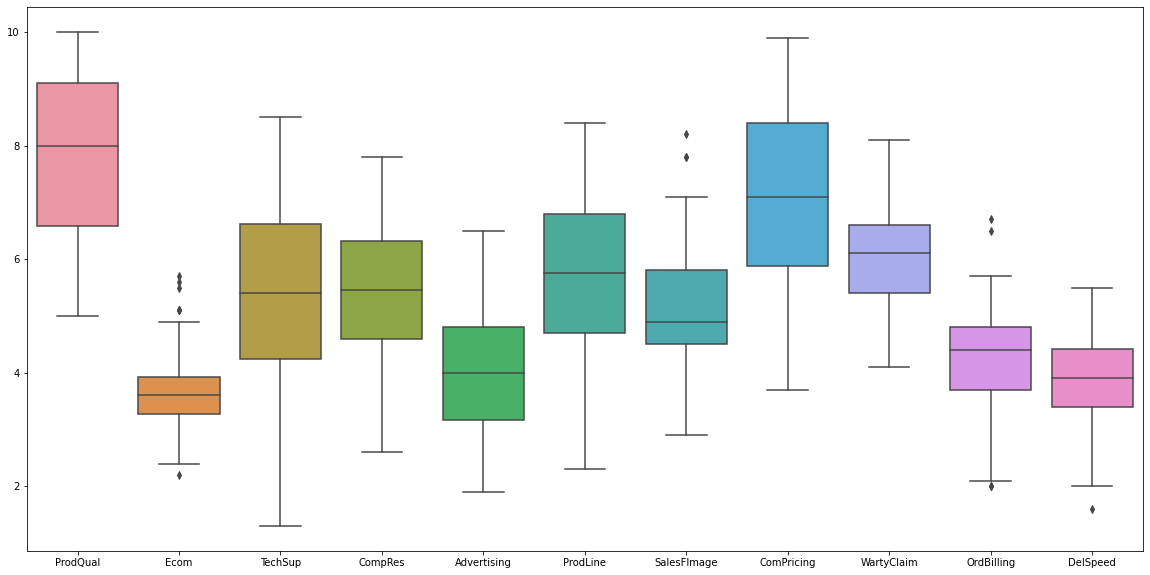

In [71]:
# Checking outliers before scaling 

plt.figure(figsize=(20,10))
sns.boxplot(data = SalonData);

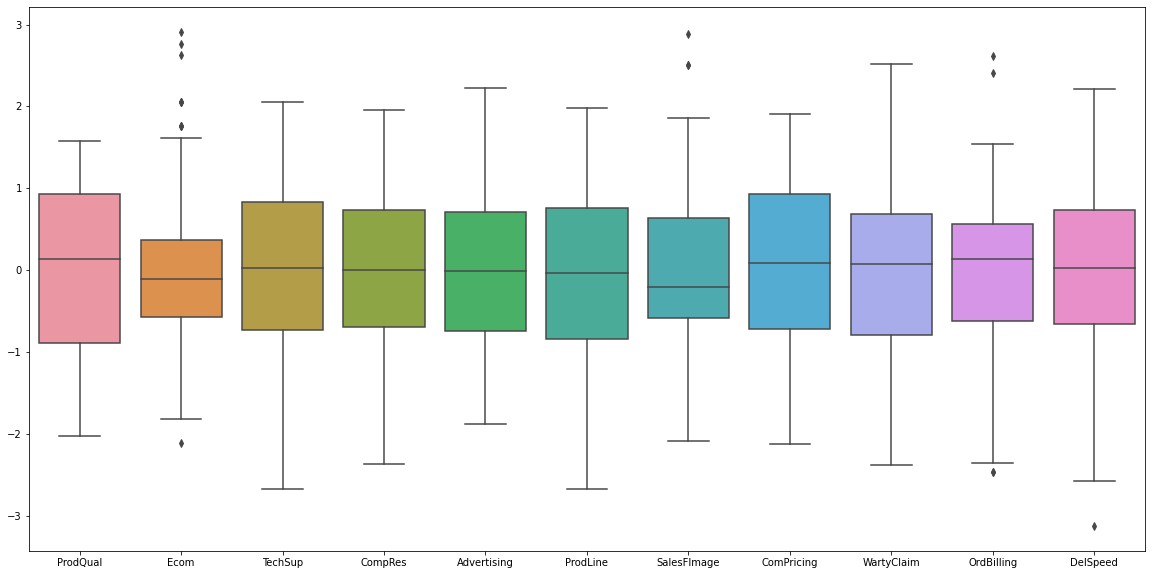

In [72]:
# Checking outliers after scaling 

plt.figure(figsize=(20,10))
sns.boxplot(data = SalonData_scaled);

##### Inferences :
##### 1. By scaling, all variables are having same standard deviation, So all variables have the same weight/magnitude and thus resulting in PCA while calculating in relevant axis.
##### 2. Post scaling the data is more normally distributed 

##### <span style="color:purple"> 5) Build the covariance matrix, eigenvalues and eigenvector. - 4 points</span>

In [85]:
# creating covariance matrix
cov_matrix = np.cov(SalonData_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01010101e+00 -1.38548704e-01  9.65661154e-02  1.07444445e-01
  -5.40132667e-02  4.82316579e-01 -1.53346338e-01 -4.05335236e-01
   8.92043497e-02  1.05356640e-01  2.79979825e-02]
 [-1.38548704e-01  1.01010101e+00  8.75544162e-04  1.41595213e-01
   4.34233041e-01 -5.32200387e-02  7.99539102e-01  2.31780203e-01
   5.24224157e-02  1.57724577e-01  1.93571786e-01]
 [ 9.65661154e-02  8.75544162e-04  1.01010101e+00  9.76329270e-02
  -6.35051180e-02  1.94571168e-01  1.71621612e-02 -2.73521901e-01
   8.05220127e-01  8.09109340e-02  2.56976702e-02]
 [ 1.07444445e-01  1.41595213e-01  9.76329270e-02  1.01010101e+00
   1.98905906e-01  5.67087831e-01  2.32072486e-01 -1.29246720e-01
   1.41826562e-01  7.64513729e-01  8.73829997e-01]
 [-5.40132667e-02  4.34233041e-01 -6.35051180e-02  1.98905906e-01
   1.01010101e+00 -1.16674936e-02  5.47680463e-01  1.35572620e-01
   1.09010852e-02  1.86096560e-01  2.78649579e-01]
 [ 4.82316579e-01 -5.32200387e-02  1.94571168e-01  5.67087831e-

In [83]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors :\n\n', eig_vecs)
print('\n Eigen Values :\n\n', eig_vals)

Eigen Vectors :

 [[ 0.13378962 -0.31349802  0.06227164  0.6431362  -0.2316662  -0.56456996
   0.19164132  0.18279209  0.06659717 -0.13547311  0.0313281 ]
 [ 0.16595278  0.44650918 -0.23524791  0.27238033 -0.42228844  0.26325703
   0.05962621  0.06233863  0.28155772  0.12202642 -0.54251104]
 [ 0.15769263 -0.23096734 -0.61095105 -0.19339314  0.02395667 -0.10876896
  -0.01719992 -0.05192956 -0.3881709  -0.46470964 -0.35929961]
 [ 0.47068359  0.01944394  0.21035078 -0.20632037 -0.02865743 -0.02815231
  -0.0084996  -0.36253352  0.53467243 -0.51339754  0.09324751]
 [ 0.18373495  0.36366471 -0.08809705  0.31789448  0.80387024 -0.20056937
  -0.06306962 -0.08118684  0.03715799  0.05347713 -0.15468169]
 [ 0.38676517 -0.28478056  0.11627864  0.20290226 -0.11667416  0.09819533
  -0.60814755 -0.38507778 -0.23479794  0.3332071  -0.08415534]
 [ 0.2036696   0.47069599 -0.2413421   0.22217722 -0.20437283  0.10497225
   0.00143735 -0.08469869 -0.35341191 -0.16910665  0.64489911]
 [-0.15168864  0.413456

##### <span style="color:purple"> 6) Write the explicit form of the first PC (in terms of Eigen Vectors) – 5 points</span>

In [82]:
#  First PC in terms of Eigen Vector is nothing but eig_vecs[0]

eig_vecs[0]

array([ 0.13378962, -0.31349802,  0.06227164,  0.6431362 , -0.2316662 ,
       -0.56456996,  0.19164132,  0.18279209,  0.06659717, -0.13547311,
        0.0313281 ])

##### <span style="color:purple"> 7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame. – 10 points</span>

In [86]:
# cumulative values of the eigenvalues
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance :", cum_var_exp)

Cumulative Variance : [ 31.1542848   54.34425491  69.71676832  79.59455066  85.1347697
  90.15189496  93.80205993  96.04707397  97.89755822  99.10520892
 100.        ]


##### From the above cumulative values of the eigenvalues, we can see that around 6 principal components explained over 90% (90.15%)  of the variance. Thus, the optimum number of principal components can be 6

##### Eigenvectors indicate the direction of the principal components, we can multiply the original data by the eigenvectors to re-organise/re-orient the data onto the new axis/dimention.

In [87]:
# Performing PCA 
from sklearn.decomposition import PCA

# NOTE - we are generating only 6 PCA dimensions as its covering over ~90% data

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(SalonData_scaled)
data_reduced.transpose()

array([[ 7.95507962e-02, -1.10096634e+00, -2.19706653e+00,
         1.56293289e+00,  7.67570385e-01,  2.90862177e+00,
         5.29319132e+00,  1.47659077e+00, -6.13947615e-01,
        -4.23660076e-01,  5.76252311e-01,  1.86757037e+00,
        -2.66029481e+00, -1.15437973e+00, -1.98252867e+00,
        -1.19534642e+00, -6.29210603e-01, -1.94912563e+00,
        -4.40654330e-01, -1.18679105e+00,  1.32903312e+00,
        -3.07501457e+00, -1.22862294e+00, -1.95215660e+00,
         2.77114349e-01, -3.38635080e-01, -1.76471720e+00,
         1.03510170e+00, -1.29479142e+00,  1.66262708e+00,
         1.44608491e-01,  2.11462740e+00,  1.06970726e+00,
        -1.09408090e-01,  1.80536022e+00,  2.12248520e+00,
         6.22051111e-01, -2.57411754e+00, -3.44966983e-01,
         1.21539637e+00,  1.25487586e+00,  1.67930781e-01,
        -1.82095895e+00, -2.33269255e+00, -8.73288881e-01,
        -1.65347263e+00, -1.03184895e+00, -3.12115015e+00,
        -1.07236222e+00, -7.97675229e-01,  1.98945764e+0

In [90]:
# Generating PCA components
pca.components_

array([[-0.13378962, -0.16595278, -0.15769263, -0.47068359, -0.18373495,
        -0.38676517, -0.2036696 ,  0.15168864, -0.21293363, -0.43721774,
        -0.47308914],
       [-0.31349802,  0.44650918, -0.23096734,  0.01944394,  0.36366471,
        -0.28478056,  0.47069599,  0.4134565 , -0.19167191,  0.02639905,
         0.07305172],
       [ 0.06227164, -0.23524791, -0.61095105,  0.21035078, -0.08809705,
         0.11627864, -0.2413421 ,  0.05304529, -0.59856398,  0.16892981,
         0.23262477],
       [ 0.6431362 ,  0.27238033, -0.19339314, -0.20632037,  0.31789448,
         0.20290226,  0.22217722, -0.33354348, -0.18530205, -0.23685365,
        -0.1973299 ],
       [ 0.2316662 ,  0.42228844, -0.02395667,  0.02865743, -0.80387024,
         0.11667416,  0.20437283,  0.24892601, -0.03292706,  0.02675377,
        -0.03543294],
       [-0.56456996,  0.26325703, -0.10876896, -0.02815231, -0.20056937,
         0.09819533,  0.10497225, -0.70973595, -0.13983966, -0.11947974,
         0.029

In [79]:
# Loading PCA components into a Dataframe
SalonData_pca_comp = pd.DataFrame(pca.components_,columns=list(SalonData_scaled))
SalonData_pca_comp.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,-0.133790,-0.165953,-0.157693,-0.470684,-0.183735,-0.386765,-0.203670,0.151689,-0.212934,-0.437218,-0.473089
1,-0.313498,0.446509,-0.230967,0.019444,0.363665,-0.284781,0.470696,0.413457,-0.191672,0.026399,0.073052
2,0.062272,-0.235248,-0.610951,0.210351,-0.088097,0.116279,-0.241342,0.053045,-0.598564,0.168930,0.232625
3,0.643136,0.272380,-0.193393,-0.206320,0.317894,0.202902,0.222177,-0.333543,-0.185302,-0.236854,-0.197330
4,0.231666,0.422288,-0.023957,0.028657,-0.803870,0.116674,0.204373,0.248926,-0.032927,0.026754,-0.035433


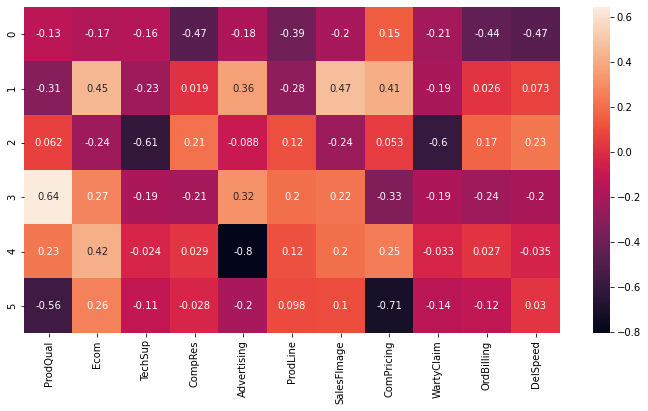

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(SalonData_pca_comp,annot=True);

##### <span style="color:purple"> 8) Mention the business implication of using the Principal Component Analysis for this case study. – 5 points</span>

##### PC1- Explains highlights about ComplaintsResolution ,OrderBilling , Delivery Speed  are big concern here , need to focus .
##### PC2- Explains great growth over Ecommerce ,SalesforceImage & competitve Pricing .
##### PC3- Explains that Technical Support & WarrantyClaim have very big concern , need to improve the same .
##### PC4- Explains that Product quality has a huge improvement . Though in this backend support need to be improved especially OrderBilling , Complaint resolution & Delivery Speed.
##### PC5- We can see great growth over the marketing strategies like Advertisement but need to focus on the competitive pricing to make the business more impactful.
##### PC6- HIghlights severe drop in Ecommerce need to focus on the same on the other side we can see great growth over competitive pricing . Advertising also has a fair amount of growth but it has dropped a bit from previous one .
##### PC7- Explains about severe concern on Product line , need to focus on the same to make the business more successfull , on the contrary there is a huge growth in the backend support in terms of OrderBilling which is been a concern for a long time , that is been adressed here .